**Load the required libraries and datasets**

In [2]:
# Load the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

In [8]:
# Load the data 
df = pd.read_csv("../data/raw/fraudTrain.csv", index_col=0)

# Data Exploration 

Exploration activities in a nutshell

- Snap of first few records of the dataset 
- Shape and structure of the dataset (features, size)
- Cleanlines of the data 
- Visualization 

    - Composition of fraudulent transactions 
    - Distribution of a continuous variable
    - Outliers in the continuous variable
    - Comparison of multi-label variable
    - Relationship between two(all continuous) or three(continuous and maybe categorical) variables
    - Trend for timely features 

In [9]:
# Snap of first few records of the dataset
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [10]:
# Shape and structure of the dataset (features, size)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [14]:
# Cleanliness of the data 
## Any duplicated records
df.duplicated().sum()

np.int64(0)

## Summary Statistics 

In [15]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# Data Visualization 
## Check Class Distribution (Imbalance)

In [23]:
df["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Lets calculate their ration in percentage and plot it 

In [25]:
df["is_fraud"].value_counts()/len(df["is_fraud"]) * 100

is_fraud
0    99.421135
1     0.578865
Name: count, dtype: float64

Less than 1% of transactions are fraudulent showing some imbalance

Text(0.5, 1.0, 'Fraudulent vs Non-Fraudulent Transactions')

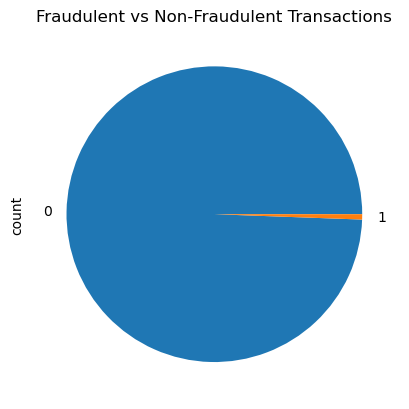

In [22]:
df["is_fraud"].value_counts().plot(kind="pie")
plt.title("Fraudulent vs Non-Fraudulent Transactions")

## Explore Transaction Amounts and Timing

Financial fraud often has behavioral signals — lets explore them:

- Transaction amount distribution: Are fraudulent transactions typically higher or lower in value?
- Transaction timing: Plot transactions over time (hourly, daily) to detect periodic fraud spikes or unusual hours.
- Outliers: Point out any extremely high or low amounts that could indicate fraud or data entry

In [27]:
# Separate fraudulent and non-fraudulent transactions
fraud_df = df[df["is_fraud"]==1]
non_fraud_df = df[df["is_fraud"]==0]

Text(0.5, 1.0, 'Distribution of amount in Fraudulent transactions')

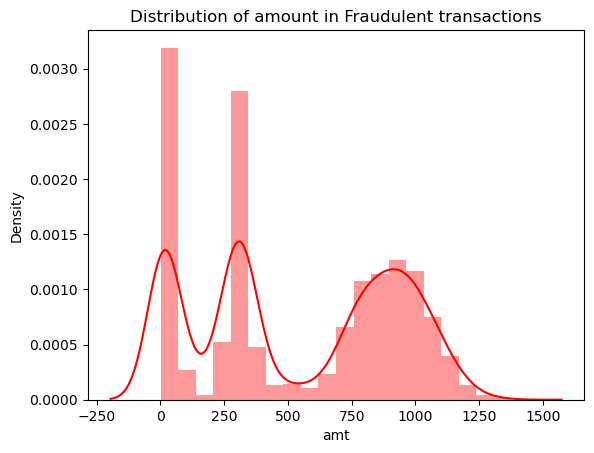

In [39]:
# Transaction amount distribution: Are fraudulent transactions typically higher or lower in value?
sns.distplot(fraud_df["amt"],bins=20, color="red")
plt.title("Distribution of amount in Fraudulent transactions")

(-350.0, 1600.0)

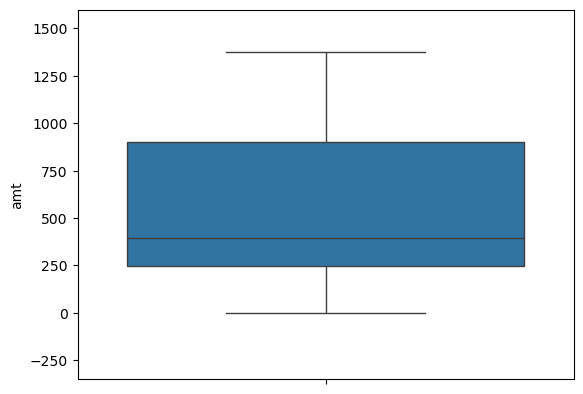

In [57]:
sns.boxplot(fraud_df["amt"])
plt.ylim(-350, 1600)

Text(0.5, 1.0, 'Distribution of amount in Legit transactions')

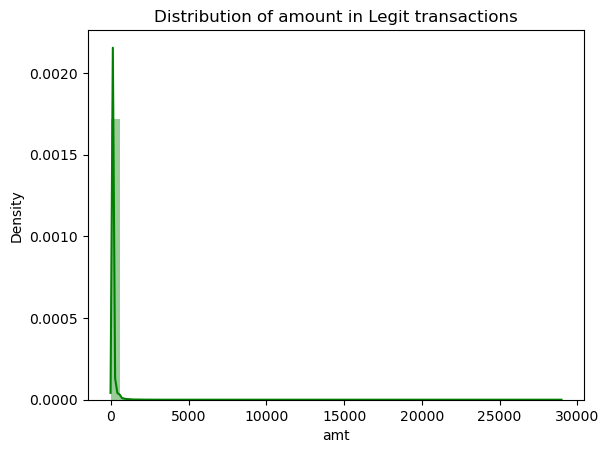

In [51]:
sns.distplot(non_fraud_df["amt"], color="green")
plt.title("Distribution of amount in Legit transactions")
# plt.xlim(0, 10000)

(0.0, 100.0)

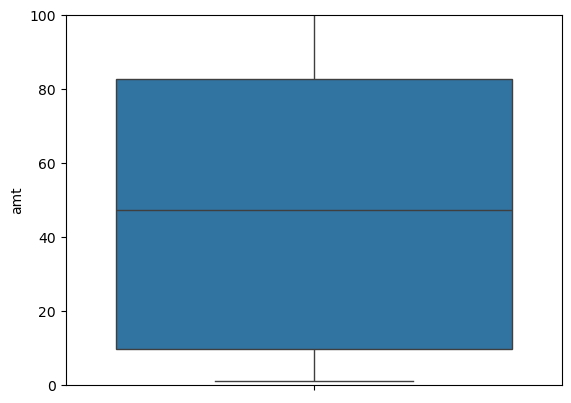

In [55]:
# Lets take it further
sns.boxplot(non_fraud_df["amt"])
plt.ylim(0, 100)

**Transaction timing:** Plot transactions over time (hourly, daily) to detect periodic fraud spikes or unusual hours.

Will be done after data cleaning 

# Feature Correlations & Relationships

This part shows analytical maturity:

- Compute correlations between features and the target variable (Class).
- Visualize using a heatmap.
- Discuss which features might be predictive.
- Be cautious not to assume causality — emphasize potential relationships.